# Question 7)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# a)

In [2]:
def func_1(w, x, b):
    w = w.flatten()
    x = x.flatten()
    label = np.sign(np.dot(w, x) + b)
    return label

In [3]:
def func(points, labels):
    w = np.zeros((points.shape[1], 1))
    b = 0
    ind = np.random.choice(range(points.shape[0]), points.shape[0], replace=False)
    p = points[ind]
    l = labels[ind]
    nums = 0
    converge = np.allclose(np.sign(p @ w + b).flatten(), l.flatten())
    for i in range(points.shape[0]):
        p_i = p[[i], :]
        l_i = l[i]
        val = func_1(w, p_i, b)
        if val != l_i:
            nums += 1
            b += l_i
            w += l_i * p_i.reshape((-1, 1))
        converge = np.allclose(np.sign(p @ w + b).flatten(), l.flatten())
        if converge:
            break
    return w, b, nums

# b)

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

data_x = x[:,(1,3)]
# we only want label 0, 1
i = np.where(y <= 1)
ind = np.array(i[0])
data_y = np.where(y[ind] == 0, -1, 1)
# so we only need to get features at indices that have label 0, 1
data_x = x[ind.reshape((-1, 1)), (1,3)]

In [5]:
w, b, nums = func(data_x, data_y)

# c)

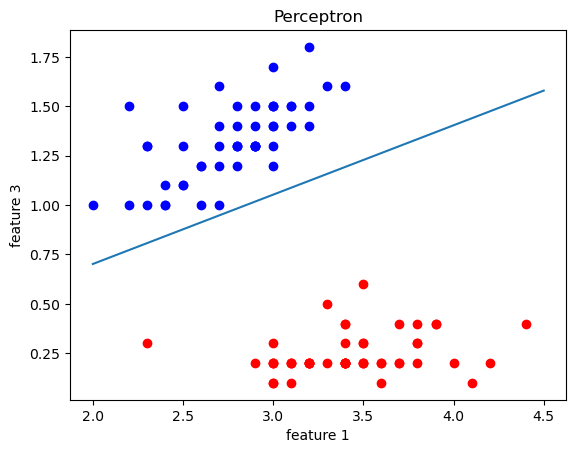

In [6]:
plt.title("Perceptron")
plt.xlabel("feature 1")
plt.ylabel("feature 3")

plt.plot(data_x[(data_y == -1), 0], data_x[(data_y == -1), 1],"or")
plt.plot(data_x[(data_y == 1), 0], data_x[(data_y == 1), 1], "ob")

line_x = np.linspace(2, 4.5)
line_y = - w[0]/w[1] * line_x - b / w[1]
plt.plot(line_x, line_y)

# d)

(array([6., 2., 1., 0., 0., 0., 4., 4., 2., 1.]),
 array([ 2. ,  3.5,  5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. ]),
 <BarContainer object of 10 artists>)

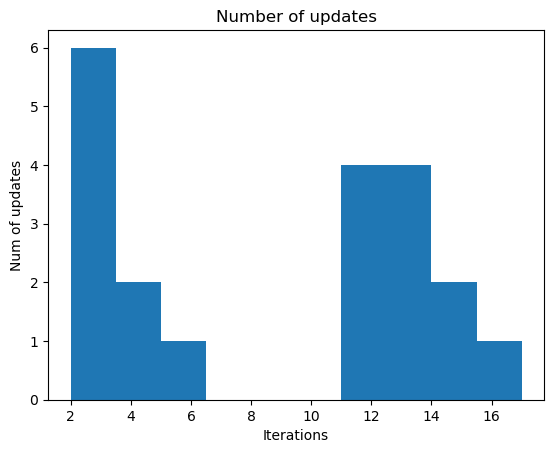

In [7]:
updates = []
total = 0
for i in range(20):
    w, b, nums = func(data_x, data_y)
    updates.append(nums)
    total += nums
    
plt.title("Number of updates")
plt.xlabel("Iterations")
plt.ylabel("Num of updates")
plt.hist(updates)

# Question 8)

# a)

Text(0, 0.5, 'feature 4')

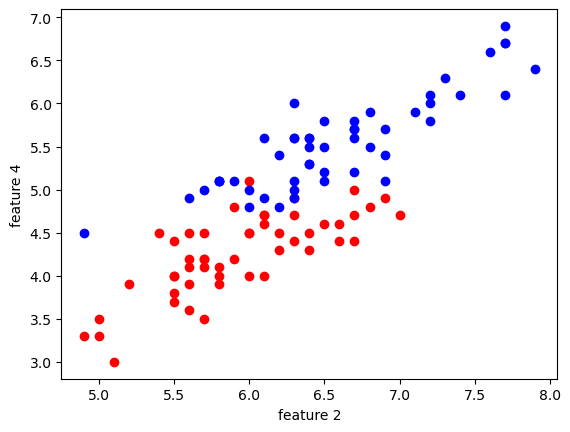

In [8]:
# we only want label 1, 2
i2 = np.where(y != 0)
ind = np.array(i2[0])
data_y2 = np.where(y[ind] == 1, -1, 1)
# so we only need to get features at indices that have label 1, 2
data_x2 = x[ind.reshape((-1,1)), (0, 2)]

plt.plot(data_x2[data_y2 == -1, 0], data_x2[data_y2 == -1,1],"or")
plt.plot(data_x2[data_y2 == 1, 0], data_x2[data_y2 == 1,1], "ob")
plt.xlabel("feature 2")
plt.ylabel("feature 4")

The data is not linear separable

# b)

In [9]:
import sklearn
from sklearn.svm import SVC
slacks = np.exp2(np.arange(-5, 5))
table = []
for c in slacks:    
    svm = sklearn.svm.SVC(kernel="linear", C=c)
    svc = svm.fit(X=data_x2, y=data_y2)

    err = np.mean(np.not_equal(svm.predict(data_x2), data_y2))
    sv = len(svc.support_)

    print("Error rate:", err, "c =", c, "# of support vectors:", sv)

Error rate: 0.11 c = 0.03125 # of support vectors: 75
Error rate: 0.09 c = 0.0625 # of support vectors: 62
Error rate: 0.07 c = 0.125 # of support vectors: 52
Error rate: 0.06 c = 0.25 # of support vectors: 45
Error rate: 0.06 c = 0.5 # of support vectors: 38
Error rate: 0.07 c = 1.0 # of support vectors: 31
Error rate: 0.06 c = 2.0 # of support vectors: 24
Error rate: 0.07 c = 4.0 # of support vectors: 21
Error rate: 0.05 c = 8.0 # of support vectors: 19
Error rate: 0.07 c = 16.0 # of support vectors: 16


# c)

c = 8 is the best value because from the table, we have the lowest error rate, 0.05 and number of support vectors is decent, 19

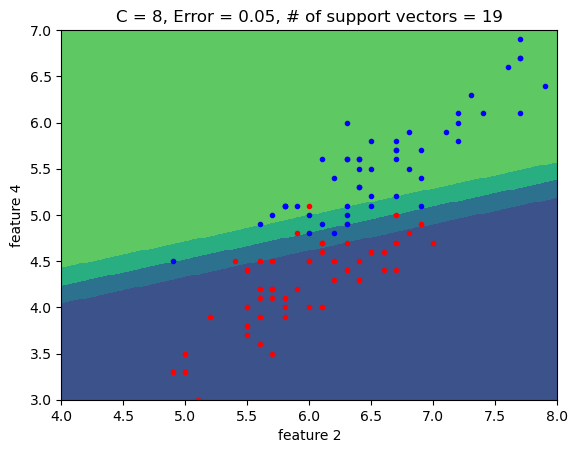

In [10]:
c = 8
svm = sklearn.svm.SVC(kernel="linear", C = c)
svc = svm.fit(X=data_x2, y=data_y2)

err = np.mean(np.not_equal(svm.predict(data_x2), data_y2))
sv = len(svc.support_)

plt.plot(data_x2[data_y2 == -1, 0], data_x2[data_y2 == -1, 1], "or", markersize = 3)
plt.plot(data_x2[data_y2 == 1, 0], data_x2[data_y2 == 1, 1], "ob", markersize = 3)

x_min, x_max = 4, 8

y_min, y_max = 3, 7

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
z = svc.decision_function(np.c_[xx.flatten(), yy.flatten()])

for i in range(len(z)):
    z[i] = min(z[i], 1.0)
    z[i] = max(z[i], -1.0)

    if (z[i] > 0.0) and (z[i] < 1.0):
        z[i] = 0.5
    if (z[i] < 0.0) and (z[i] > -1.0):
        z[i] = -0.5

z = z.reshape(xx.shape)

plt.title(f"C = {c}, Error = {err}, # of support vectors = {sv}")
plt.pcolormesh(xx, yy, z, vmin = -2, vmax = 2)
plt.xlabel("feature 2")
plt.ylabel("feature 4")
plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
plt.show()